train acc, test acc | 0.09751666666666667, 0.0974
train acc, test acc | 0.7890333333333334, 0.7932
train acc, test acc | 0.87725, 0.8815
train acc, test acc | 0.89885, 0.9027
train acc, test acc | 0.9094, 0.9128
train acc, test acc | 0.91465, 0.9172
train acc, test acc | 0.9202, 0.9216
train acc, test acc | 0.9244, 0.9266
train acc, test acc | 0.9280166666666667, 0.9299
train acc, test acc | 0.9318166666666666, 0.9332
train acc, test acc | 0.93485, 0.9357
train acc, test acc | 0.93715, 0.9376
train acc, test acc | 0.9395, 0.9366
train acc, test acc | 0.9425333333333333, 0.9407
train acc, test acc | 0.9434666666666667, 0.9437
train acc, test acc | 0.9458666666666666, 0.9436
train acc, test acc | 0.9476, 0.9451


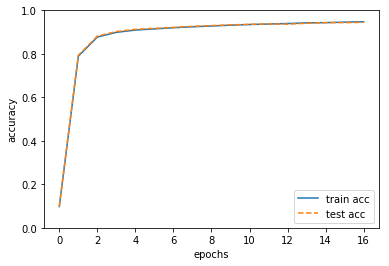

In [2]:
import sys, os
sys.path.append(os.pardir) 
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.gradient(x_batch, t_batch)
     
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
